In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [3]:
df_scaled = pd.read_csv("Customer Churn_scaled.csv")

df_scaled.info()
df_scaled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call__failure            3150 non-null   float64
 1   complains                3150 non-null   float64
 2   subscription__length     3150 non-null   float64
 3   charge__amount           3150 non-null   float64
 4   seconds_of_use           3150 non-null   float64
 5   frequency_of_use         3150 non-null   float64
 6   frequency_of_sms         3150 non-null   float64
 7   distinct_called_numbers  3150 non-null   float64
 8   age_group                3150 non-null   float64
 9   tariff_plan              3150 non-null   float64
 10  status                   3150 non-null   float64
 11  age                      3150 non-null   float64
 12  customer_value           3150 non-null   float64
dtypes: float64(13)
memory usage: 320.1 KB


,call__failure,complains,subscription__length,charge__amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value
count,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03
mean,3.609106e-17,7.218212e-17,1.804553e-16,-2.706829e-17,-1.026340e-16,9.699472e-17,-1.353415e-17,-5.864797e-17,-1.353415e-16,-2.255691e-17,-1.297022e-17,1.894781e-16,-1.804553e-17
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00
min,-1.050285e+00,-2.878304e-01,-3.446277e+00,-6.199620e-01,-1.065571e+00,-1.210027e+00,-6.520682e-01,-1.365692e+00,-2.046172e+00,-2.904089e-01,-5.746621e-01,-1.811888e+00,-9.110902e-01
25%,-9.125954e-01,-2.878304e-01,-2.965316e-01,-6.199620e-01,-7.341034e-01,-7.396783e-01,-5.986016e-01,-7.847895e-01,-9.256156e-01,-2.904089e-01,-5.746621e-01,-6.793455e-01,-6.909433e-01
50%,-2.241493e-01,-2.878304e-01,2.867546e-01,-6.199620e-01,-3.531985e-01,-2.693294e-01,-4.649353e-01,-1.457972e-01,1.949413e-01,-2.904089e-01,-5.746621e-01,-1.130744e-01,-4.690990e-01
75%,6.019860e-01,-2.878304e-01,6.367263e-01,3.757346e-02,4.778829e-01,4.449042e-01,1.231965e-01,6.093755e-01,1.949413e-01,-2.904089e-01,-5.746621e-01,-1.130744e-01,6.140363e-01
max,3.906527e+00,3.474268e+00,1.686642e+00,5.955393e+00,3.006150e+00,3.232157e+00,3.999520e+00,4.269059e+00,2.436055e+00,3.443420e+00,1.740153e+00,2.718281e+00,3.277612e+00


Evaluation and selection steps of the optimal number of clusters K for the K-means clustering algorithm

K = 2: Silhouette Score = 0.2419, Davies-Bouldin Index = 1.8088
K = 3: Silhouette Score = 0.2415, Davies-Bouldin Index = 1.6178
K = 4: Silhouette Score = 0.2077, Davies-Bouldin Index = 1.6292
K = 5: Silhouette Score = 0.2329, Davies-Bouldin Index = 1.4526
K = 6: Silhouette Score = 0.2589, Davies-Bouldin Index = 1.3039
K = 7: Silhouette Score = 0.2872, Davies-Bouldin Index = 1.1995
K = 8: Silhouette Score = 0.3023, Davies-Bouldin Index = 1.1218
K = 9: Silhouette Score = 0.3133, Davies-Bouldin Index = 1.1129
K = 10: Silhouette Score = 0.3127, Davies-Bouldin Index = 1.1352


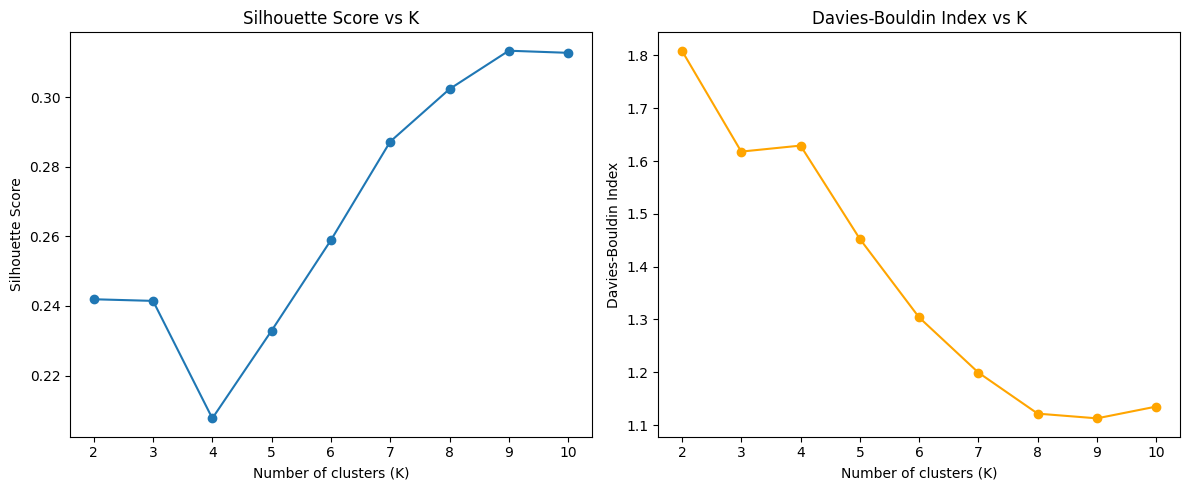

In [4]:
X = df_scaled.values

range_k = range(2, 11)
silhouette_scores = []
db_indexes = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    sil_score = silhouette_score(X, cluster_labels, sample_size=1000, random_state=42)
    silhouette_scores.append(sil_score)
    
    db_index = davies_bouldin_score(X, cluster_labels)
    db_indexes.append(db_index)
    
    print(f"K = {k}: Silhouette Score = {sil_score:.4f}, Davies-Bouldin Index = {db_index:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1,2,2)
plt.plot(range_k, db_indexes, marker='o', color='orange')
plt.title('Davies-Bouldin Index vs K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


In [5]:
best_k_sil = range_k[silhouette_scores.index(max(silhouette_scores))]  # Not the best choice since the index is not close to 1
best_k_db = range_k[db_indexes.index(min(db_indexes))]

print(f"Best K theo Silhouette Score: {best_k_sil}")
print(f"Best K theo Davies-Bouldin Index: {best_k_db}")

Best K theo Silhouette Score: 9
Best K theo Davies-Bouldin Index: 9


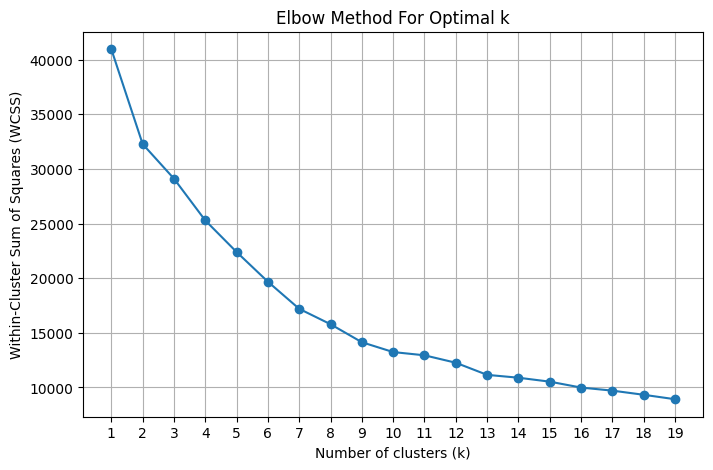

In [ ]:
wcss = []
range_k = range(1, 20)

for k in range_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_k)
plt.grid(True)
plt.show()

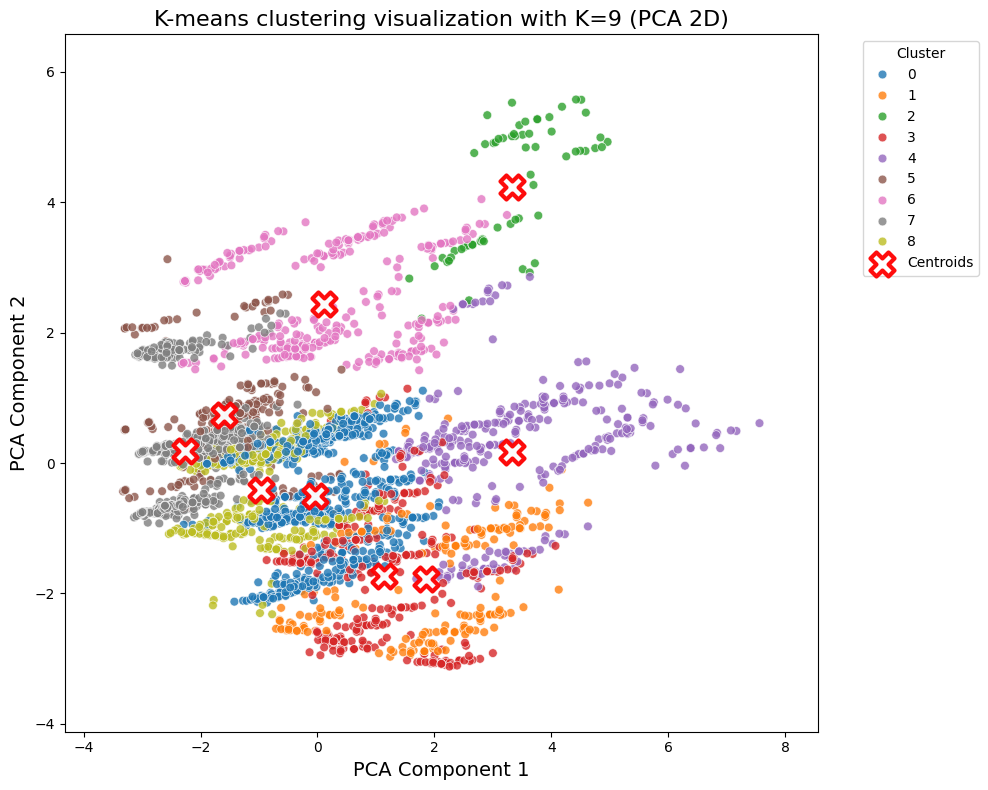

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Giảm chiều xuống 2D với PCA để vẽ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Chọn K
k = 9  # hoặc k = 4, 5,... tùy bạn

# Chạy K-means clustering với K này
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Tính tâm cụm trên dữ liệu gốc (chuẩn hóa X nếu cần)
centroids = kmeans.cluster_centers_

# Chuyển tâm cụm qua không gian PCA 2D để vẽ
centroids_pca = pca.transform(centroids)

# Vẽ scatter plot với màu sắc theo nhãn cluster
plt.figure(figsize=(10,8))

# Vẽ scatter plot điểm dữ liệu theo cluster
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', legend='full', s=40, alpha=0.8)

# Bóng đổ nhẹ phía dưới centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=350,
            c='gray',
            marker='X',
            alpha=0.3)

# Centroid thật
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=300,
            c='white',
            marker='X',
            edgecolor='red',
            linewidth=3,
            label='Centroids',
            alpha=0.95)

plt.title(f'K-means clustering visualization with K={k} (PCA 2D)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

# Legend ra ngoài biểu đồ bên phải cho rộng hơn
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tinh chỉnh giới hạn trục cho khít vùng dữ liệu (nếu muốn)
plt.xlim(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1)
plt.ylim(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1)

plt.tight_layout()
plt.show()




In [21]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Giảm chiều xuống 3 thành phần chính
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Chọn số cụm K, ví dụ 9 hoặc 11
k = 9

# Chạy K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Chuẩn bị DataFrame để vẽ
import pandas as pd
df_vis = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_vis['Cluster'] = labels.astype(str)

# Vẽ biểu đồ 3D interactive với Plotly
fig = px.scatter_3d(df_vis, x='PC1', y='PC2', z='PC3',
                    color='Cluster',
                    title=f'K-means Clustering 3D Visualization (K={k})',
                    labels={'PC1': 'PCA Component 1',
                            'PC2': 'PCA Component 2',
                            'PC3': 'PCA Component 3'})

fig.show()

